In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
X_test = joblib.load("../models/X_processed.pkl")
y_test = joblib.load("../models/y.pkl")

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (1338, 11)
y_test shape: (1338,)


In [3]:
models = {
    "Linear Regression": joblib.load("../models/linear_regression.pkl"),
    "Ridge Regression": joblib.load("../models/ridge_regression.pkl"),
    "Random Forest": joblib.load("../models/random_forest_optimized.pkl"),
}


In [4]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


In [5]:
results = []

n = X_test.shape[0]
p = X_test.shape[1]

for name, model in models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n, p)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "Adjusted R²": adj_r2
    })

results_df = pd.DataFrame(results)
results_df


,Model,MAE,RMSE,R²,Adjusted R²
0,Linear Regression,4170.886894,6041.679651,0.750913,0.748847
1,Ridge Regression,4174.379716,6041.721698,0.750910,0.748843
2,Random Forest,1223.027661,2234.473537,0.965929,0.965646


In [6]:
results_df.sort_values(by="RMSE")


,Model,MAE,RMSE,R²,Adjusted R²
2,Random Forest,1223.027661,2234.473537,0.965929,0.965646
0,Linear Regression,4170.886894,6041.679651,0.750913,0.748847
1,Ridge Regression,4174.379716,6041.721698,0.750910,0.748843


In [7]:
best_model_name = results_df.sort_values(by="RMSE").iloc[0]["Model"]
best_model = models[best_model_name]

print("Best model based on RMSE:", best_model_name)


Best model based on RMSE: Random Forest


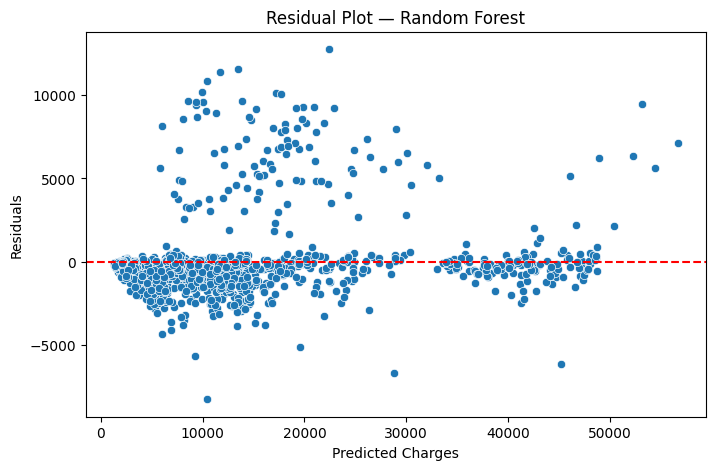

In [8]:
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title(f"Residual Plot — {best_model_name}")
plt.show()


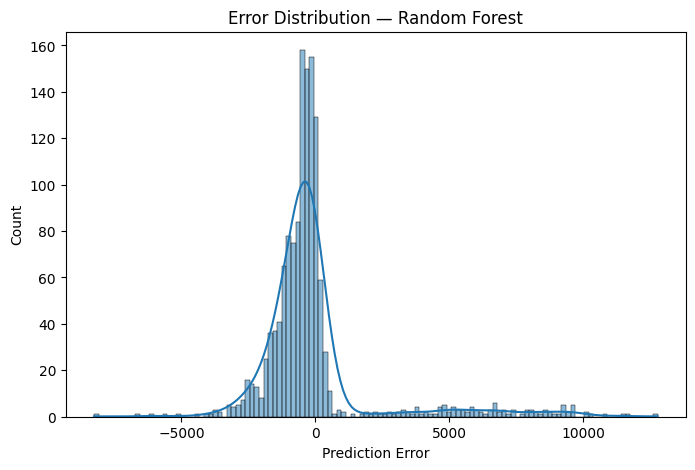

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.title(f"Error Distribution — {best_model_name}")
plt.show()


In [10]:
results_df.to_csv("../models/M9_model_comparison.csv", index=False)
